<a href="https://colab.research.google.com/github/TranThiDieuHien/Cac-thuat-toan-toi-uu/blob/main/%C4%90%E1%BB%93_%C3%A1n_c%C3%A1c_thu%E1%BA%ADt_to%C3%A1n_t%E1%BB%91i_%C6%B0u_trong_ph%C3%A2n_t%C3%ADch_d%E1%BB%AF_li%E1%BB%87u.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
#import thư viện
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from scipy import stats
import seaborn as sns
from matplotlib import pyplot as plt
import statsmodels.api as sm
%matplotlib inline
plt.rcParams['figure.figsize'] = [16, 9]
plt.rcParams['figure.dpi'] = 50
plt.rcParams.update({'font.size': 18})
import os
import string
from scipy.stats import norm

from wordcloud import WordCloud,STOPWORDS
stopwords = list(STOPWORDS)
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer as CVTZ

from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer


## **PHÂN TÍCH MÔ TẢ**

HOTEL INFORMATION

In [6]:
#doc file
data = pd.read_csv("ThuaThienHue_Infor.csv")

In [7]:
data.sample(10)

,HAddress,HAttractions,HGFW,HImages,HLanguage,HName,HPMax,HPMin,HPRange,HQuestions,...,HRNumber,HRank,HRankreview,HRating,HRestaurants,HReview,HRoom,HStyles,HVideos,URL
91,"Lot 3, QL49, Phu Thuong, Ngoc Anh, Hue 530000 ...",3.0,39.0,NaN,NaN,Ha Anh Guesthouse,NaN,NaN,NaN,Which popular attractions are close to Ha Anh ...,...,0,NaN,0.0,NaN,10.0,NaN,5,NaN,0.0,https://www.tripadvisor.com/Hotel_Review-g2939...
175,"79 Thich Tinh Khiet, Hue Vietnam",6.0,48.0,NaN,NaN,Thanh Lich Guesthouse,NaN,NaN,NaN,Which popular attractions are close to Thanh L...,...,0,NaN,0.0,NaN,23.0,NaN,6,NaN,0.0,https://www.tripadvisor.com/Hotel_Review-g2939...
599,"Long Ho Ha village Land 23, Huong Tra, Hue Vie...",0.0,NaN,76.0,"English, French, Spanish, Vietnamese",Tam Tinh Vien Homestay,$43,$29,$29 - $43,Which popular attractions are close to Tam Tin...,...,96,#10 of 183 B&Bs / Inns in Hue,5.0,3.0,0.0,Excellent,4,"Romantic,Charming",6.0,https://www.tripadvisor.com/Hotel_Review-g2939...
646,"6 Tran Anh Lien, Hue 52000 Vietnam",18.0,66.0,NaN,NaN,Golden Inn Hotel,NaN,NaN,NaN,Which popular attractions are close to Golden ...,...,3,#96 of 209 hotels in Hue,50.0,NaN,113.0,Excellent,15,NaN,NaN,https://www.tripadvisor.com/Hotel_Review-g2939...
488,"39 Nyugen Cong Tru, Hue Vietnam",26.0,92.0,NaN,"English, Vietnamese",Bao Son 1 Hotel,$19,$18,$18 - $19,Which popular attractions are close to Bao Son...,...,2,#50 of 183 B&Bs / Inns in Hue,5.0,1.0,138.0,Excellent,16,Budget,NaN,https://www.tripadvisor.com/Hotel_Review-g2939...
554,"11B Nguyen Cong Tru, Hue 530000 Vietnam",26.0,94.0,16.0,NaN,Carnosa Hotel,$20,$11,$11 - $20,Which popular attractions are close to Carnosa...,...,42,#27 of 183 B&Bs / Inns in Hue,4.0,2.0,135.0,Very good,40,Family,12.0,https://www.tripadvisor.com/Hotel_Review-g2939...
498,"84-86 Street 2 An Cuu Ward, Hue 530000 Vietnam",0.0,41.0,NaN,NaN,Hue Budget Hostel,$21,$15,$15 - $21,What are some of the property amenities at Hue...,...,NaN,NaN,NaN,NaN,12.0,NaN,11,NaN,NaN,https://www.tripadvisor.com/Hotel_Review-g2939...
480,"35 Nguyen Luong Bang, Phuong Phu Hoi, Hue Vietnam",5.0,70.0,NaN,NaN,Nguyen Hung Homestay,$27,$17,$17 - $27,Which popular attractions are close to Nguyen ...,...,NaN,NaN,NaN,NaN,20.0,NaN,Hue,NaN,NaN,https://www.tripadvisor.com/Hotel_Review-g2939...
181,"45 Pham Van Dong, Hue Vietnam",5.0,48.0,NaN,Vietnamese,Giang Ngoc Hostel,NaN,NaN,NaN,Which popular attractions are close to Giang N...,...,0,NaN,0.0,NaN,22.0,NaN,5,NaN,0.0,https://www.tripadvisor.com/Hotel_Review-g2939...
540,"41 Chu Van An Street, Hue Vietnam",27.0,93.0,10.0,"English, French, Chinese, Japanese",Mintea Hostel,$15,$14,$14 - $15,Which popular attractions are close to Mintea ...,...,30,#36 of 267 Specialty lodging in Hue,4.5,NaN,168.0,Excellent,5,Budget,4.0,https://www.tripadvisor.com/Hotel_Review-g2939...


In [8]:
data.columns.values

array(['HAddress', 'HAttractions', 'HGFW', 'HImages', 'HLanguage',
       'HName', 'HPMax', 'HPMin', 'HPRange', 'HQuestions', 'HRImages',
       'HRNumber', 'HRank', 'HRankreview', 'HRating', 'HRestaurants',
       'HReview', 'HRoom', 'HStyles', 'HVideos', 'URL'], dtype=object)

Ta thấy được rằng số lượng khách sạn được đánh giá là Excellent và Very good là rất cao, chiếm số phần trăm lớn hơn gấp nhiều lần so với Average, Poor và Terrible.

=> Chứng tỏ độ thỏa mãn của khách hàng đối với đa số khách sạn ở Huế là rất cao

=> Khách sạn ở Huế phù hợp để được chọn là nơi nghỉ ngơi khi đi du lịch, công tác tại Huế.


In [9]:
new_data = data.dropna()
print(new_data)

                                              HAddress  HAttractions  HGFW  \
26                          46 Chu Van An, Hue Vietnam          27.0  92.0   
27                   4 Tran Quang Khai St, Hue Vietnam          28.0  93.0   
28   5 Lane 27 Nguyen Sinh Cung Street, Hue 530000 ...           3.0  81.0   
31            17 Nguyen Hue Street, Hue 008454 Vietnam           4.0  77.0   
33           50A Hung Vuong Street, Hue 530000 Vietnam           6.0  94.0   
..                                                 ...           ...   ...   
685               2 Luong The Vinh Street, Hue Vietnam          17.0  96.0   
688           16/7 Nguyen Cong Tru, Hue 530000 Vietnam          25.0  92.0   
689  Number 8 Lane 43 Nguyen Cong Tru Street, Hue 5...          25.0  91.0   
690             17 Nguyen Thai Hoc, Hue 530000 Vietnam          27.0  92.0   
691         4/34 Nguyen Tri Phuong Street, Hue Vietnam          14.0  97.0   

     HImages                             HLanguage  \
26      1

In [10]:
#Sap xep lai du lieu theo thu tu
index = []
print(len(new_data))
for i in range (1, len(new_data)+1):
    index.append(i)
new_data["Index"] = index
index1 = new_data.set_index("Index")
new_data = index1.sort_index()
new_data.head(10)

79


<ipython-input-10-6aa5121d2c50>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data["Index"] = index


,HAddress,HAttractions,HGFW,HImages,HLanguage,HName,HPMax,HPMin,HPRange,HQuestions,...,HRNumber,HRank,HRankreview,HRating,HRestaurants,HReview,HRoom,HStyles,HVideos,URL
Index,,,,,,,,,,,,,,,,,,,,,
1,"46 Chu Van An, Hue Vietnam",27.0,92.0,14.0,"English, Vietnamese",Hong Thien Backpackers Hotel,$18,$15,$15 - $18,Which popular attractions are close to Hong Th...,...,338,#6 of 75 hostels in Hue,4.5,2.0,160.0,Excellent,12,Budget,8.0,https://www.tripadvisor.com/Hotel_Review-g2939...
2,"4 Tran Quang Khai St, Hue Vietnam",28.0,93.0,193.0,"English, Vietnamese",Villa Hue,"$1,074",$29,$29 - $1074,Which popular attractions are close to Villa H...,...,369,#32 of 138 hotels in Hue,4.5,4.0,185.0,Excellent,34,"Quiet,Mid-range",22.0,https://www.tripadvisor.com/Hotel_Review-g2939...
3,"5 Lane 27 Nguyen Sinh Cung Street, Hue 530000 ...",3.0,81.0,62.0,"English, Vietnamese",Charming Riverside Hotel,$15,$13,$13 - $15,Which popular attractions are close to Charmin...,...,374,#6 of 138 hotels in Hue,5.0,2.0,24.0,Excellent,21,"Quiet,Charming",8.0,https://www.tripadvisor.com/Hotel_Review-g2939...
4,"17 Nguyen Hue Street, Hue 008454 Vietnam",4.0,77.0,398.0,"English, French, Chinese, Vietnamese",Mondial Hotel Hue,$49,$29,$29 - $49,Which popular attractions are close to Mondial...,...,467,#46 of 138 hotels in Hue,4.0,4.0,20.0,Very good,106,"Mid-range,Business",27.0,https://www.tripadvisor.com/Hotel_Review-g2939...
5,"50A Hung Vuong Street, Hue 530000 Vietnam",6.0,94.0,683.0,"English, Vietnamese",Vinpearl Hotel Hue,$104,$61,$61 - $104,Which popular attractions are close to Vinpear...,...,511,#1 of 138 hotels in Hue,5.0,5.0,74.0,Excellent,213,"Modern,Business",28.0,https://www.tripadvisor.com/Hotel_Review-g2939...
6,"29 Doi Cung Str, Hue Vietnam",28.0,94.0,295.0,Vietnamese,Midtown Hotel Hue,$48,$35,$35 - $48,Which popular attractions are close to Midtown...,...,518,#43 of 138 hotels in Hue,4.0,4.0,190.0,Very good,88,"River View,Modern",4.0,https://www.tripadvisor.com/Hotel_Review-g2939...
7,"7/64 Nguyen Cong Tru Phu Hoi, Hue 530000 Vietnam",25.0,91.0,59.0,Vietnamese,New Valentine Hotel,$19,$12,$12 - $19,Which popular attractions are close to New Val...,...,543,#26 of 138 hotels in Hue,4.5,2.0,134.0,Excellent,20,"Budget,Centrally Located",4.0,https://www.tripadvisor.com/Hotel_Review-g2939...
8,"59 Vo Thi Sau, Phu Hoi Ward, Hue 530000 Vietnam",27.0,93.0,111.0,"English, French, Vietnamese",Thanh Lich Hue Hotel,$45,$24,$24 - $45,Which popular attractions are close to Thanh L...,...,573,#9 of 138 hotels in Hue,4.5,3.0,145.0,Excellent,50,"City View,Family",27.0,https://www.tripadvisor.com/Hotel_Review-g2939...
9,"49 Le Loi Street, Hue 530000 Vietnam",26.0,94.0,382.0,Vietnamese,Century Riverside Hue Hotel,$57,$33,$33 - $57,Which popular attractions are close to Century...,...,604,#49 of 138 hotels in Hue,3.5,4.0,134.0,Very good,125,"Great View,River View",61.0,https://www.tripadvisor.com/Hotel_Review-g2939...


In [11]:
location = []
atc = new_data["HAttractions"]
gfw = new_data["HGFW"]
rn = new_data["HRestaurants"]
for i in range(1, len(new_data)+1):
    loca = atc[i] + gfw[i] + rn[i]
    location.append(loca)
new_data["Location"] = location
print(new_data[["HName", "Location"]].sample(10))

                               HName  Location
Index                                         
54                   The Times Hotel     265.0
69             Sunshine Hostel 3 Hue     274.0
8               Thanh Lich Hue Hotel     265.0
53                  Poetic Hue Hotel     268.0
44                        DMZ Hostel     281.0
7                New Valentine Hotel     250.0
37                        Amy2hostel     265.0
12     Muong Thanh Holiday Hue Hotel     294.0
41                     Nhu Phu Hotel     275.0
16            Hue Four Seasons Hotel     250.0


In [12]:
#Xoa ky tu "&" trong cot
new_data["HPMax"] = new_data["HPMax"].str.replace(r'\D', '')

<ipython-input-12-1c7ca86a766b>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  new_data["HPMax"] = new_data["HPMax"].str.replace(r'\D', '')


Phát biểu giả thuyết
- $$H_{0}: \mu_{0} = \mu_{1}$$
    Giá tiền tỉ lệ thuận với số lượng địa điểm vui chơi, ăn uống
- $$H_{1}: \mu_{0} <> \mu_{1}$$
    Giá tiền không tỉ lệ thuận với số lượng địa điểm vui chơi, ăn uống

In [13]:
#Su dung thong ke t_test
for i in range(1, len(new_data)+1):
      new_data["HPMax"] = new_data["HPMax"].astype(int)
      new_data["Location"] = new_data["Location"].astype(int)
stat, p_value = stats.ttest_ind(new_data["HPMax"], new_data["Location"])
print('Stat =', stat, 'P_value =', p_value)
if p_value < 0.05:
    print('''Có bằng chứng thống kê để bác bỏ giả thuyết H0. Điều này ngụ ý rằng
          giá tiền khách sạn không tỉ lệ thuận với số lượng địa điểm vui chơi, ăn uống gần khách sạn''')
else:
    print('''Chưa có bằng chứng thống kê để bác bỏ giả thuyết H0. Điều này ngụ ý rằng
          giá tiền khách sạn tỉ lệ thuận với số lượng địa điểm vui chơi, ăn uống gần khách sạn''')

Stat = -11.474055483278516 P_value = 1.7499803730252178e-22
Có bằng chứng thống kê để bác bỏ giả thuyết H0. Điều này ngụ ý rằng
          giá tiền khách sạn không tỉ lệ thuận với số lượng địa điểm vui chơi, ăn uống gần khách sạn


Nhận xét: Giá tiền khách sạn không tỉ lệ thuận với số lượng địa điểm vui chơi, ăn uống gần khách sạn.

HOTEL REVIEW COMMENTS

In [14]:
#doc file
data_comment = pd.read_csv("ThuaThienHue.csv")

In [15]:
data_comment.sample(4)

,HComment,HCommenter,HContribute,HDate,HThanks,HTime,HTravelType,HTravelerRating,h_Hotel_name,h_reviewer_address,h_reviewer_id,h_title_comment,h_url
19054,I enjoyed my stay in Hue for couple of days. S...,Matias P,7.0,Jan-18,3.0,18-Jan,Trip type: Traveled solo,5.0,Poetic Hue Hotel,NaN,https://www.tripadvisor.com/Profile/MatiasP939,Easy travelling,https://www.tripadvisor.com/Hotel_Review-g2939...
10615,The staff at the hotel were very friendly and ...,Old backpackers,1.0,Sep-19,1.0,19-Sep,Trip type: Traveled as a couple,5.0,Holiday Diamond Hotel,NaN,https://www.tripadvisor.com/Profile/backpackin...,Geraldine,https://www.tripadvisor.com/Hotel_Review-g2939...
14059,Great hotel in a great location. The art deco ...,Michael Q,21.0,Apr-13,5.0,13-May,Trip type: Traveled with friends,5.0,Azerai La Residence Hue,"Grays Thurrock, United Kingdom",https://www.tripadvisor.com/Profile/MichaelQ993,Vietnam adventure,https://www.tripadvisor.com/Hotel_Review-g2939...
9856,We enjoyed this hotel. The value was excellent...,skisnowridge,3.0,Jan-15,3.0,15-Jan,NaN,5.0,Eldora Hotel,NaN,https://www.tripadvisor.com/Profile/skisnowridge,Great hotel,https://www.tripadvisor.com/Hotel_Review-g2939...


Kiểm tra các giá trị null

In [16]:
# Kiem tra cac gia tri null
data_comment.isnull().sum()

HComment               635
HCommenter             636
HContribute            650
HDate                  661
HThanks               3348
HTime                  633
HTravelType           3972
HTravelerRating        628
h_Hotel_name           620
h_reviewer_address    5266
h_reviewer_id          648
h_title_comment        635
h_url                    0
dtype: int64

Làm sạch dữ liệu

In [17]:
import re

def  clean_text(text):
    """
    Lam sach cac du lieu van ban
    * ky hieu
    * doi thanh lower case
    """
    text = text.str.lower()
    text = text.apply(lambda T: re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", str(T))  )

    return text

In [18]:
data_comment.columns.values

array(['HComment', 'HCommenter', 'HContribute', 'HDate', 'HThanks',
       'HTime', 'HTravelType', 'HTravelerRating', 'h_Hotel_name',
       'h_reviewer_address', 'h_reviewer_id', 'h_title_comment', 'h_url'],
      dtype=object)

In [19]:
data_comment['HComment']= clean_text(data_comment['HComment'])

In [20]:
data_comment[["HComment", 'HTravelerRating']].sample(10)

,HComment,HTravelerRating
20016,this was a great stay for me and my girlfriend...,5.0
8062,stayed here for 2 nights in july staff could n...,4.0
10397,this was so tranquil and relaxing in our villa...,5.0
1434,we stayed here for three nights basic clean ho...,4.0
15355,the location in an alley is pleasant in reduci...,5.0
4851,we are touring vnm with children and old peopl...,5.0
3238,this small hotel is pure bliss from the momen...,5.0
17289,everything was excellent the breakfast was del...,5.0
1937,first i have to tell you about the woman in ch...,5.0
21448,friendly staff very helpfull location very goo...,5.0


Đếm số lượng từng Rating

In [21]:
data_comment.HTravelerRating.value_counts()

5.0    15218
4.0     4433
3.0     1344
2.0      525
1.0      409
Name: HTravelerRating, dtype: int64

<Axes: xlabel='HTravelerRating', ylabel='count'>

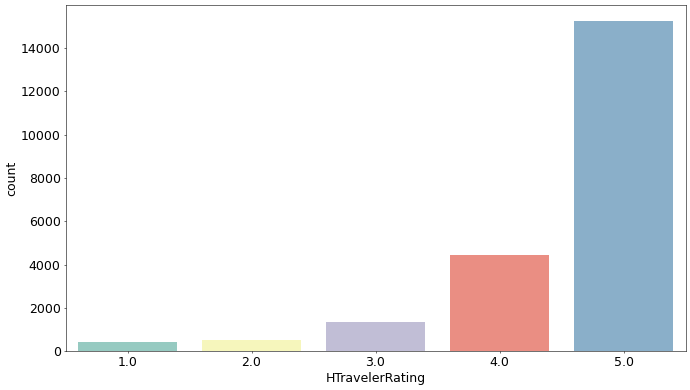

In [22]:
sns.countplot(data=data_comment,x='HTravelerRating', palette="Set3")

Nhận xét: Số lượng rating 5 sao cho các khách sạn ở Huế cao gấp nhiều lần tổng rating 1 đến 4 sao.

=> Điều này có nghĩa rằng các khách sạn ở Huế rất tốt và phù hợp với nhu cầu của khách hàng.



Ta có thể thấy rõ rằng biến mục tiêu (Rating) không cân bằng, vì có sự khác biệt rất lớn trong rating từ 1 và 5. Vì vậy, ở đây ta sẽ sử dụng một số kỹ thuật lấy mẫu để cân bằng các lớp này.

Lấy số lượng từ trong mỗi bài đánh giá

<ipython-input-23-dd1dd83a673a>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(words_per_review,fit=norm, kde=False)


<Axes: >

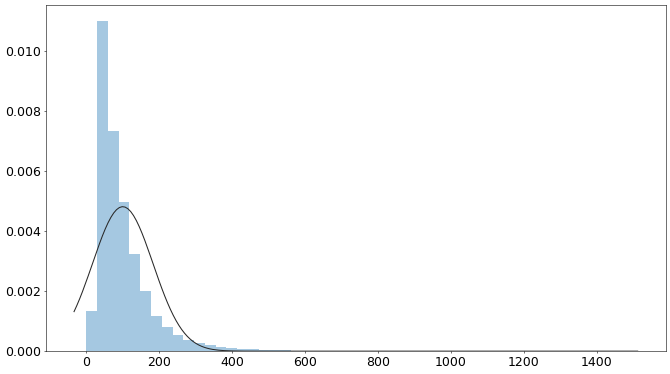

In [23]:
## Lấy số lượng từ bằng cách tách chúng theo dấu cách
words_per_review = [len(x.split(" ")) for x in data_comment['HComment']]
sns.distplot(words_per_review,fit=norm, kde=False)


Wordcloud của các từ phổ biến nhất

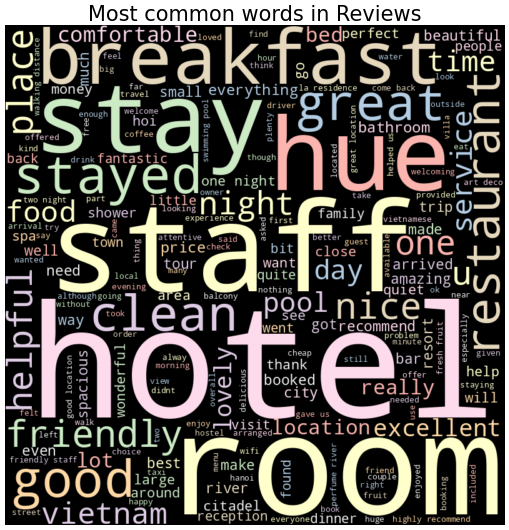

In [24]:
def wordCloud_generator(data_comment):
    wordcloud = WordCloud(width = 800, height = 800,
                          background_color ='black',
                          min_font_size = 10,
                          colormap='Pastel1'
                         ).generate(" ".join(data_comment.values))
    # plot the WordCloud image
    plt.figure(figsize = (10, 10), facecolor = None)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.tight_layout(pad = 0)
    plt.title("Most common words in Reviews",fontsize=30)
    plt.show()

wordCloud_generator(data_comment['HComment'])

## **PHÂN TÍCH DỮ LIỆU VÀ SỬ DỤNG CÁC THUẬT TOÁN TỐI ƯU**

## Xử lý trước văn bản


Bây giờ, ta sẽ xử lý trước các comment bằng cách sử dụng một số công cụ NLP như:
1. Chuyển thành lower case
2. Xoá dấu chấm câu
3. Xoá những từ dừng
4. Stemming
5. Bổ sung

In [ ]:
import nltk
nltk.download('all')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [26]:
punc=string.punctuation

stop_words = set(stopwords.words('english'))

stemmer = PorterStemmer()

lemmatizer = WordNetLemmatizer()

def data_preprocessing(txt):

    #converting to lowercase
    txt=txt.lower()

    #Removing Punctuation
    txt="".join([x for x in txt if x not in punc])

    #Removing stopwords
    txt=" ".join([word for word in str(txt).split() if word not in stop_words])

    #Stemming
    txt = " ".join([stemmer.stem(word) for word in txt.split()])

    #Lemmatization
    txt = " ".join([lemmatizer.lemmatize(word) for word in txt.split()])

    return txt

data_comment['text'] = data_comment['HComment'].apply(data_preprocessing)

In [27]:
data_rating = data_comment[["HComment", 'HTravelerRating', 'text']]

In [28]:
# Xoa cac hang co chua gia tri null
data_rating = data_rating[data_rating['HComment'].notna()]
data_rating = data_rating[data_rating['HTravelerRating'].notna()]
data_rating = data_rating[data_rating['text'].notna()]

In [29]:
#Xem tap du lieu moi
data_rating

,HComment,HTravelerRating,text
1,fantastic room excellent staff and fabulous ex...,5.0,fantast room excel staff fabul excurs outsid c...
2,we stayed at azerai la residence hue during th...,5.0,stay azerai la resid hue tet holiday group 3 f...
3,im just back from two nights at the azerai la ...,5.0,im back two night azerai la resid delight stay...
4,we stayed here for four nights in april 2021 o...,5.0,stay four night april 2021 obvious covid pande...
5,we spent a few days exploring hu and we were v...,5.0,spent day explor hu happi everyth hotel comfor...
...,...,...,...
22552,we were pleased with the room compared to othe...,4.0,plea room compar other price rang help staff
22553,we were met by the owner in the street he conv...,4.0,met owner street convinc u choos hotel disappo...
22554,stayed for two nights and chose the penthouse ...,4.0,stay two night chose penthous option fun binh ...
22555,guidebook recommendation we got a big airy roo...,3.0,guidebook recommend got big airi room top floo...


## Dự đoán mức độ hài lòng đặt phòng khách sạn qua Rating từ 1 đến 5 sao

Thư viện: [machine_learning, scikit-learn, logistic_regression, kNN, decision_tree, random_forest, adaboost, naive_bayes, quadratic_discriminant_analysis, gaussian_process,,...]

Chúng ta sẽ xem xét việc áp dụng các thuật toán Machine Learning cho tập dữ liệu lấy từ TripAdvisor để phân loại xem xét, phân loại và dự đoán mức độ hài lòng đặt phòng khách sạn ở Thừa Thiên Huế.

Ta sẽ sử dụng thuật toán scikit-learn để xử lý tập dữ liệu này.

## Tập dữ liệu

# Chi tiết về tập dữ liệu

Đặc điểm của tập dữ liệu: Đa biến

Đặc điểm thuộc tính: Số nguyên

Nhiệm vụ liên quan: Phân loại

Số lượng instance: 22556

Số thuộc tính: 3

Khu vực: Các khách sạn ở Thừa Thiên

# Thông tin thuộc tính

1.HComment: Bình luận, đánh giá của khách hàng

2.HTravelerRating: 1- 5 sao

3.text: HComment đã chỉnh sửa

Ta sẽ sử dụng HTravelerRating và text cho phần phân tích dữ liệu và dự báo này

## Vectơ hóa văn bản đầu vào

Bây giờ chúng ta sẽ vectơ rating bằng cách sử dụng điểm TF-IDF và chúng ta sẽ sử dụng toarray () để chuyển đổi ma trận thưa thớt kết quả thành ma trận dày đặc.




In [30]:
### Tạo một đối tượng của class TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfconverter = TfidfVectorizer(max_features=400, min_df=0.05, max_df=0.9)
tfidf = tfidfconverter.fit_transform(data_rating['text']).toarray()

## Chia thành các training sets và test sets

In [31]:
X_train, X_test, y_train, y_test = train_test_split(tfidf,data_rating['HTravelerRating'],test_size=0.2,random_state=42)

## Lấy mẫu ngược bằng SMOTE

Vì biến mục tiêu của ta không cân bằng, ta sẽ sử dụng thuật toán SMOTE để lấy mẫu thêm cho các lớp thiểu số.

In [32]:
from sklearn.utils import resample
from collections import Counter


print("Trước khi lấy mẫu ngược:-")
print(Counter(y_train))


Trước khi lấy mẫu ngược:-
Counter({5.0: 12160, 4.0: 3574, 3.0: 1080, 2.0: 402, 1.0: 327})


In [33]:
# Su dung SMOTE de lay mau
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)

print("Sau khi lấy mẫu ngược:-")
print(Counter(y_train))

Sau khi lấy mẫu ngược:-
Counter({5.0: 12160, 4.0: 12160, 3.0: 12160, 2.0: 12160, 1.0: 12160})


## TRAIN MODEL
Ta sẽ đào tạo các mô hình khác nhau từ thư viện sklearn trên dữ liệu này và xem từng mô hình hoạt động như thế nào.

In [88]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [89]:
names = ["Logistic Regression", "Nearest Neighbors",
         "Decision Tree", "Random Forest", "AdaBoost",
         "Naive Bayes", "QDA"]

In [90]:
classifiers = [
    LogisticRegression(max_iter=300),
    KNeighborsClassifier(),
    DecisionTreeClassifier(max_depth=5, random_state=43),
    RandomForestClassifier(max_depth=5, random_state=43),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

In [91]:
# iterate over classifiers
for name, clf in zip(names, classifiers):
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    print(f"Accuracy of {name} Classifier is:{score}")

Accuracy of Logistic Regression Classifier is:0.6215230278157775
Accuracy of Nearest Neighbors Classifier is:0.17487460100319197
Accuracy of Decision Tree Classifier is:0.4473324213406293
Accuracy of Random Forest Classifier is:0.6356589147286822
Accuracy of AdaBoost Classifier is:0.6101231190150479
Accuracy of Naive Bayes Classifier is:0.6162790697674418
Accuracy of QDA Classifier is:0.6999544003647971


## Bây giờ hãy xem liệu chúng ta có thể cải thiện hiệu suất của các thuật toán này hay không.

## Chuẩn hóa các tính năng bằng cách loại bỏ giá trị trung bình và chia tỷ lệ thành phương sai đơn vị. Sẽ được sử dụng với một số thuật toán.

In [92]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

## Logistic Regression

In [93]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(random_state=43, class_weight={4: 2}, max_iter=800, n_jobs=-1)
lr_model.fit(X_train, y_train)
lr_accuracy = lr_model.score(X_test, y_test)
print(f"Accuracy of Logistic Regression Classifier is:{lr_accuracy}")

Accuracy of Logistic Regression Classifier is:0.5592795257637939


Ở đây, ta không thể cải thiện hiệu suất của thuật toán Logistic Regression

## K Nearest Neighbor Algorithm

In [94]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=3, n_jobs=-1)
knn_model.fit(X_train_scaled, y_train)
knn_accuracy = knn_model.score(X_test_scaled, y_test)
print(f"Accuracy of kNN Classifier is:{knn_accuracy}")

Accuracy of kNN Classifier is:0.21409028727770177


Ta đã cải thiện hơn` 4,25% về điểm chính xác tổng thể từ 17,49% lên 21,41%

## Decision Trees

In [95]:
from sklearn import tree

tree_model = tree.DecisionTreeClassifier(class_weight={4: 2}, max_depth=4, random_state=43)
tree_model.fit(X_train, y_train)

tree_accuracy = tree_model.score(X_test, y_test)
print(f"Accuracy of Decision Tree Classifier is:{tree_accuracy}")

Accuracy of Decision Tree Classifier is:0.3593251253989968


Ở đây, ta không thể cải thiện hiệu suất của thuật toán Decision Trees

## Random Forest

In [96]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(class_weight={4: 2}, max_depth=40, n_estimators=300, max_features=2, random_state=43, n_jobs=-1)
rf_model.fit(X_train, y_train)

rf_accuracy = rf_model.score(X_test, y_test)
print(f"Accuracy of Random Forest Classifier is:{rf_accuracy}")

Accuracy of Random Forest Classifier is:0.7583219334245326


Ta đã cải thiện hơn` 12,26% về điểm chính xác tổng thể từ 63,57% lên 75,83% bằng cách thay đổi max_depth

## AdaBoost

In [97]:
from sklearn.ensemble import AdaBoostClassifier

ada_model = AdaBoostClassifier(random_state=43, n_estimators=800)
ada_model.fit(X_train, y_train)
ada_accuracy = ada_model.score(X_test, y_test)
print(f"Accuracy of Ada Boost Classifier is:{ada_accuracy}")

Accuracy of Ada Boost Classifier is:0.65640674874601


Ta đã cải thiện hơn`4,63% về điểm chính xác tổng thể từ 60,01% lên 65,64%

## Gaussian Naive Bayes

In [98]:
from sklearn.naive_bayes import GaussianNB

gnb_model = GaussianNB()
gnb_model.fit(X_train, y_train)
gnb_accuracy = gnb_model.score(X_test, y_test)
print(f"Accuracy of Gaussian Naive Bayes Classifier is:{gnb_accuracy}")

Accuracy of Gaussian Naive Bayes Classifier is:0.6162790697674418


Ở đây, ta không thể cải thiện hiệu suất của thuật toán Gaussian Naive Bayes

## Quadratic Discriminant Analysis

In [99]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

qda_model = QuadraticDiscriminantAnalysis()
qda_model.fit(X_train, y_train)
qda_accuracy = qda_model.score(X_test, y_test)
print(f"Accuracy of Quadratic Discriminant Analysis Classifier is:{qda_accuracy}")

Accuracy of Quadratic Discriminant Analysis Classifier is:0.6999544003647971


Ở đây, ta không thể cải thiện hiệu suất của thuật toán Quadratic Discriminant Analysis